Introducción a la ciencia de datos con Python
Rafael Caballero

## Pandas - Operaciones avanzadas con dataframes
### Índice
[Cambio de orientación](#Orientación)<br>
&emsp;&emsp;[`pivot`: de largo a ancho](#pivot)<br>
&emsp;&emsp;[`melt`: de ancho a largo](#melt)<br>

[Agregaciones](#Agregaciones)<br>


<a name="Orientación"></a>

A menudo tenemos que "tumbar" una tabla haciendo que valores se conviertan en columnas, o por el contrario juntar varias columnas en una. Estas funciones nos van a permitir hacer esta tarea.



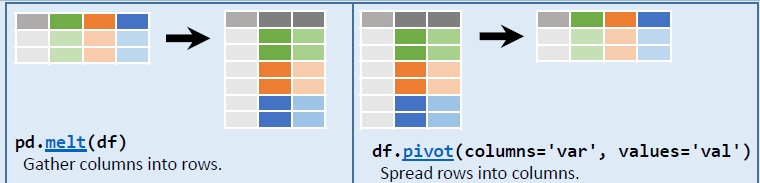

<a name="pivot"></a>

## Pivot

3 parámetros relevantes

- columns: la columna (o columnas) cuyos valores serán las nuevas columnas
- values: columna con la que se rellenaran estos valores
- index: columna cuyo contenido pasará a ser el índice

<img src=https://pandas.pydata.org/docs/_images/reshaping_pivot.png width=400>

In [ ]:
import pandas as pd
url = r"https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"

df = pd.read_csv(url, encoding="latin1")
df

Queremos tener una columna por cada comunidad:

<a name="Operadores-para-secuencias"></a>

In [ ]:
df2 = df.pivot(columns="Comunidad", values="Total", index="Periodo")
df2

<a name="melt"></a>
## Melt

Es la operación contraria. En esta ocasión se indican las columnas que no hay que tocar, las que hacen de "clave primaria":

<img src="https://miro.medium.com/max/1400/0*O3SGf68-vlON_H8L.png" width=400>

In [ ]:
df2["Periodo"] = df2.index.values
df2.melt(id_vars=["Periodo"])

En el dataframe

https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/valores.csv

queremos que todas las columnas salvo "fecha" se conviertan en valores de una columna

In [ ]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/valores.csv"
df = pd.read_csv(url)
df

In [ ]:
df.melt(id_vars = ["fecha"])

<a name="Agregaciones"></a>
## Agregaciones

Ya sabemos que se pueden utilizar funciones de agregación por columnas

<table>
<thead><tr><th>Function</th><th>Description</th></tr></thead><tbody><tr><td>count</td><td>Number of non-null observations</td></tr><tr><td>sum</td><td>Sum of values</td></tr><tr><td>mean</td><td>Mean of values</td></tr><tr><td>mad</td><td>Mean absolute deviation</td></tr><tr><td>median</td><td>Arithmetic median of values</td></tr><tr><td>min</td><td>Minimum</td></tr><tr><td>max</td><td>Maximum</td></tr><tr><td>mode</td><td>Mode</td></tr><tr><td>abs</td><td>Absolute Value</td></tr><tr><td>prod</td><td>Product of values</td></tr><tr><td>std</td><td>Unbiased standard deviation</td></tr><tr><td>var</td><td>Unbiased variance</td></tr><tr><td>sem</td><td>Unbiased standard error of the mean</td></tr><tr><td>skew</td><td>Unbiased skewness (3rd moment)</td></tr><tr><td>kurt</td><td>Unbiased kurtosis (4th moment)</td></tr><tr><td>quantile</td><td>Sample quantile (value at %)</td></tr><tr><td>cumsum</td><td>Cumulative sum</td></tr><tr><td>cumprod</td><td>Cumulative product</td></tr><tr><td>cummax</td><td>Cumulative maximum</td></tr><tr><td>cummin</td><td>Cumulative minimum</td></tr></tbody>
</table>



In [ ]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/valores.csv"
df = pd.read_csv(url)
df

In [ ]:
df.INDU_Index_High.max(), df.INDU_Index_High.min()

Sin embargo en otras ocasiones nos hará falta calcular estos datos por grupos. El siguiente ejemplo tiene datos de tweets de las elecciones USA2020 para varios usuarios, incluyendo el "sentimiento" que expresa el tweet sobre el candidato Biden (B) y Trump (T)

In [ ]:
import pandas as pd
url = "https://github.com/RafaelCaballero/tdm/blob/master/datos/todousa2020_users.xlsx?raw=true"

df = pd.read_excel(url)
df

Para cada `userid` queremos saber la opinión media de estos usuarios para los dos candidatos (B) y (T).

Esto se hace en dos fases:

- Primero se agrupa con group by

In [ ]:
df_userid = df.groupby('userid')
df_userid



Ahora se hacen las operaciones que se deseen sobre los grupos creados

In [ ]:
df_user = df_userid.agg(
      t_media=('T', 'mean'),
      b_media=('B', 'mean')
)
df_user

**Ejercicio** Ahora queremos saber en el fichero 

https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/vote_intention.csv

que contiene datos de encuestas, la edad media de los votantes de cada partido (el voto es vote_r y la edad age)